In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import mne
import os
import seaborn as sns

from environment_info import *
from patient_info import *
#import environment_info

# now we have data_dir, scripts_dir, and root_dir

sns.set()

In [3]:
def conv_montage(file):
    montage_array = (''.join([chr(i) for i in file['Montage']['MontageString']])).split(' ')
    return montage_array

def get_num_chans(file):
    num_chans = int(np.sum(list(file['Montage']['Montage'])))
    return num_chans
    

In [7]:
# define path of interest for a particular patient
path_int = os.path.join(data_dir,patient_names[0]+data_file_suffix)

# load in the file
f = h5py.File(path_int,'r')


In [9]:
# generate a random sequence for the number of channels 

# get the number of channels
num_chans = get_num_chans(f)

# generate a random sequence
random_seq = np.random.permutation(num_chans)

# get the montage
montage = conv_montage(f)


### power

In [13]:
labels_data = list(f['power'].keys())
freq_names = list(f['power'][labels_data[0]])
freq_names
power_trials = np.squeeze(np.array([[f['power'][interest][interest_freq] for interest_freq in  f['power'][interest]] for interest in labels_data]))

In [38]:
power_trials

array([[[  1.71733863e+01,   1.10400056e+01,   7.51558091e+00, ...,
           4.64481708e+00,   4.16109438e+00,   4.60368896e+00],
        [  2.28947114e+00,   8.68630339e+00,   6.93456313e-01, ...,
           1.29556531e+00,   4.56535625e-01,   1.25146541e+00],
        [  5.92277696e+03,   6.36921747e+03,   6.64525938e+03, ...,
           9.33196811e+03,   1.55061621e+04,   1.70332992e+04],
        ..., 
        [  2.16880398e+01,   2.30414591e+01,   1.27166775e+01, ...,
           2.25221187e+01,   2.77912676e+01,   4.43101035e+01],
        [  2.32074909e+04,   2.24285451e+04,   2.26923723e+04, ...,
           4.86438521e+04,   7.43794519e+04,   7.75927229e+04],
        [  8.82894598e+03,   7.93145420e+03,   6.80317838e+03, ...,
           1.10692224e+04,   1.43966918e+04,   1.37267157e+04]],

       [[  1.84730927e+01,   1.23262320e+01,   8.33370300e+00, ...,
           4.32854770e+00,   3.92541454e+00,   4.42260661e+00],
        [  2.10326762e+00,   9.26543733e+00,   8.30421362e-0

### connectivity

In [35]:
labels_data = list(f['connectivity'].keys())
connectivity_names = list(f['connectivity'][labels_data[0]])
freq_names = list(f['connectivity'][labels_data[0]][connectivity_names[0]])

connectivity_trials = np.squeeze(np.array([[[f['connectivity'][interest][interest_con][interest_meas] for interest_meas in f['connectivity'][interest][interest_con]] for interest_con in  f['connectivity'][interest]] for interest in labels_data]))

In [45]:
list(f['connectivity']['double1']['psi'].items())

[('HG', <HDF5 dataset "HG": shape (108, 108), type "<f8">),
 ('alpha', <HDF5 dataset "alpha": shape (108, 108), type "<f8">),
 ('beta', <HDF5 dataset "beta": shape (108, 108), type "<f8">),
 ('gamma', <HDF5 dataset "gamma": shape (108, 108), type "<f8">),
 ('theta', <HDF5 dataset "theta": shape (108, 108), type "<f8">)]

### raw signal

In [195]:
labels_data = list(f['data'].keys())
signal_mat = np.array([f['data'][interest][:] for interest in labels_data])

In [196]:
signal_mat.shape

(3, 108, 312000)

KeyboardInterrupt: 

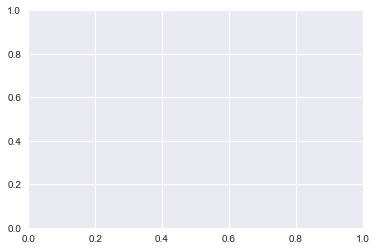

In [187]:
plt.figure()
plt.plot(signal_mat[0])

In [ ]:
#https://github.com/emanuele/convert_matlab73_hdf5